# P2: Investigate a Dataset (Titanic)

### Sean Angiolillo

In [43]:
# import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Enable inline plotting
%matplotlib inline

# Investigating the Data

My first step was to investigate the dataset provided in order to have an idea of what questions I might be able to answer. From the csv, I can see that the data is of different types, so I chose to read in the data as a pandas DataFrame. I took a look at the head and tail, and checked the data types of each column. 

In [4]:
# read in data as a dataframe
titanic_df = pd.read_csv('titanic_data.csv')

In [5]:
# look at first 5 rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# look at last 5 rows
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


I found descriptions of the variables at: https://www.kaggle.com/c/titanic/data        

# Questions about the Data

Now with an idea of what this dataset contains, I'd like to explore the relationship between a few demographic factors and their likelihood of surival. Specifically:
- What impact did gender have on the likelihood of survival?
- What impact did socioeconomic status (as proxied by Pclass) have on the likelihood of surival?
- What impact did age have on the likelihood of survival?

# Data Wrangling

From titanic_df.info(), I can see the RangeIndex is 891 entries, 0 to 890. It seems to make sense to set PassengerId as the index as I prefer to have a meaningful index. I also gave a label to the columns.

In [8]:
# set PassengerId as index
titanic_df = pd.read_csv('titanic_data.csv', index_col = 0)

In [9]:
# set 'VARIABLES' as the name for columns
titanic_df.columns.name = 'VARIABLES'

As I'm only interested in the above questions, I also want to remove unnecessary columns of data that would distract from the focus of the analysis. Fare data could communicate information regarding the impact of socioeconomic status on the likelihood of survival, but I will take Pclass as a more reliable indicator for its simplicity of just 3 unique values.

In [10]:
# drop unnecessary columns
titanic_df = titanic_df.drop(['SibSp','Parch','Embarked','Ticket','Cabin', 'Fare'], axis=1)
titanic_df.head()

VARIABLES,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0


In [11]:
# confirming properties of the DataFrame after Data Wrangling
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 41.8+ KB


Surived, Pclass, and Age are already stored as numeric data types and so can be used for calculations.

In [12]:
print(titanic_df['Sex'].unique())
print(titanic_df['Survived'].unique())
print(titanic_df['Pclass'].unique())

['male' 'female']
[0 1]
[3 1 2]


Checking for unique values for these columns helps confirm a lack of errors in the data.

Age is the only column for analysis without a full 891 entries. I'll discuss how to handle missing age data in the section below on age.

In [41]:
titanic_df.describe()

/Users/seanangiolillo/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


VARIABLES,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,NaN
50%,0.000000,3.000000,NaN
75%,1.000000,3.000000,NaN
max,1.000000,3.000000,80.000000


# Data Exploration

## Overall Survival Rate

To begin I wanted some basic information about the survival statistics of the dataset as a whole.

In [15]:
# 0 represents dead; 1 represents survival.
print(titanic_df['Survived'].unique())
# how many survived
print(titanic_df['Survived'].sum())
# overall survival rate
print(titanic_df['Survived'].mean())

[0 1]
342
0.3838383838383838


Of 891 passengers in the dataset, 342 of them, or 38.38% survived. Because the values are just 0 and 1, the mean of the data is the same as the overall survival rate. Now I can begin examining the data more closely, looking into survival breakdowns according to the interested variables.

In [16]:
by_survivors = titanic_df.groupby('Survived')

In [17]:
count_by_survivors = by_survivors['Survived'].count()
count_by_survivors

Survived
0    549
1    342
Name: Survived, dtype: int64

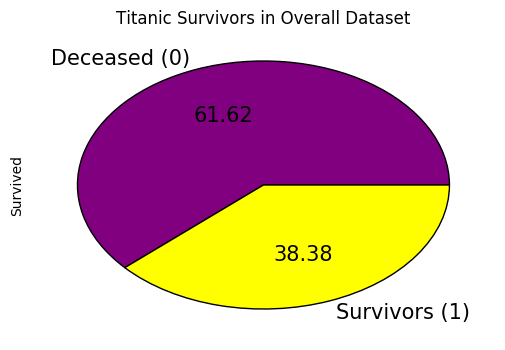

In [18]:
count_by_survivors.plot.pie(title='Titanic Survivors in Overall Dataset', labels=['Deceased (0)','Survivors (1)'], colors=['purple','yellow'], autopct='%.2f', fontsize=15)
plt.show()

## Gender

Now I'll begin investigating what effect, if any, gender had on likelihood of survival.

In [19]:
print(titanic_df['Sex'].unique())
print(titanic_df['Sex'].describe())

['male' 'female']
count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


These two results suggest to me that no further data wrangling is needed in this column. Appears to be error free and complete.

In [20]:
group_by_sex = titanic_df.groupby('Sex')

# Apply the sum function to the groupby object
sex_df = group_by_sex.sum()
sex_df

VARIABLES,Survived,Pclass,Age
Sex,,,
female,233,678,7286.00
male,109,1379,13919.17


Ignoring columns for Pclass and Age, this table shows that of the 342 survivors, 233 were female and 109 were male. Since 577 of 891 passengers were male (~65%), to have less than 32% of surivors be male is a noteworthy result. This is what we'd expect as women and children were given preference on lifeboats. The same can be seen graphically below.

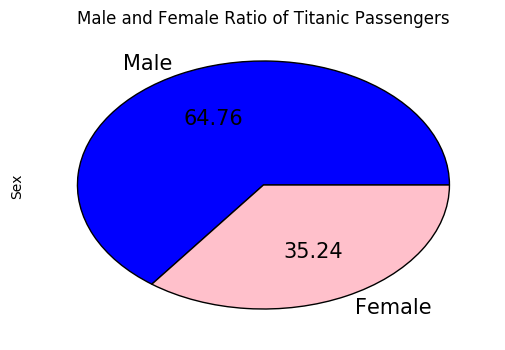

In [21]:
titanic_df.Sex.value_counts().plot(kind='pie', title='Male and Female Ratio of Titanic Passengers', labels=['Male','Female'], colors=['b','pink'], autopct='%.2f', fontsize=15)
plt.show()

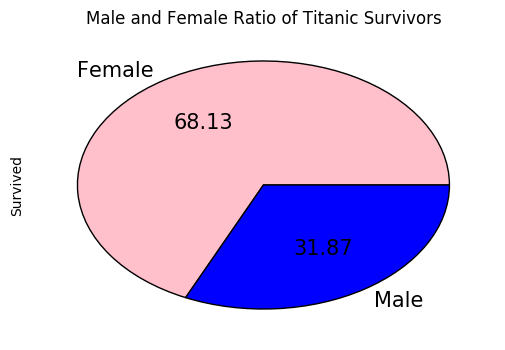

In [22]:
sex_df['Survived'].plot(kind='pie', title='Male and Female Ratio of Titanic Survivors', labels=['Female','Male'], colors=['pink','b'], autopct='%.2f', fontsize=15)
plt.show()

#### Chi-squared Test for Independence
We can perform a chi squared test to determine if the data is statistically significant. We have two nominal variables so we can perform the test for independence. The chi squared test requires us to avoid dependent samples and small expected frequencies, but neither is a problem in this case.

##### Null Hypothesis:
- Survival rate will not differ according to gender. Survival and gender are independent variables.

##### Alternate Hypothesis:
- Survival and gender are not independent variables. Gender influences survival.

In [127]:
 from IPython.display import HTML, display
# from : http://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook
 data = [['Observed Frequencies'],
         ['','Survived','Died','Total'],
         ['Male',109,468,577],
         ['Female',233,81,314],
         ['Total',342,549,891]
         ]

 display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

In [23]:
# chi squared for independence test
chisquare([109, 468, 233, 81], f_exp=[221.4747475, 355.5252525, 120.5252525, 193.4747475])

Power_divergenceResult(statistic=263.05057419824652, pvalue=9.8377311580670732e-57)

In [119]:
# find critical value
from scipy.stats import chi2
# from : https://bytes.com/topic/python/answers/962734-how-calculate-critical-value-chi-square-distribution-python
chi2.isf(q=0.05, df=1)

3.8414588206941245

With this result, we can reject the null hypothesis because the chi square statistic of 263.05 far exceeds our critical value at alpha = 0.05 (3.841). We can conclude the two variables are not independent of each other.

#### Cramer's V
We can also calculate cramer's v for a measurement of effect size. According to guidelines, above 0.50 for k-1=1 can be considered a large effect, and so this is a very large effect.

In [ ]:
# cramer v...

In [117]:
# we can perform a chi_sq test to determine if the result is statistically significant
# 233 of 314 females survive
# 109 of 577 males survive

342

# of female die
# of male die

m_survived_o = sex_df['Survived']['male']
f_survived_o = sex_df['Survived']['female']

total = titanic_df['Sex'].count()
m_total = 577
f_total = 314

m_dead_o = m_total - m_survived_o 
f_dead_o = f_total - f_survived_o


m_survived_e = m_total * (m_survived_o + f_survived_o / total)
f_survived_e = f_total * (m_survived_o + f_survived_o / total)

m_dead_e = m_total * ((total - (m_survived_o + f_survived_o)) / total)
f_dead_e = f_total * ((total - (m_survived_o + f_survived_o)) / total)

# chi squared for independence test
chisquare([m_survived_o, m_dead_o, f_survived_o, f_dead_o], f_exp=[m_survived_e, m_dead_e, f_survived_e, f_dead_e])

Power_divergenceResult(statistic=96770.739758665994, pvalue=0.0)

In [115]:
#type(titanic_df.Sex.value_counts())
#titanic_df['Sex'].value_counts()
#sex_df['Survived']['male']
# titanic_df['Sex']['female'].value_counts()
titanic_df['Sex'].mode()
#group_by_sex.count()

Exception: Column(s) Survived already selected

## Socioeconomic Class (Pclass)

In [24]:
print(titanic_df['Pclass'].unique())
print(titanic_df['Pclass'].describe())

[3 1 2]
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


Having only three unique values and 891 entries confirms no missing or erroneous data.

In [25]:
by_class = titanic_df.groupby('Pclass')
count_by_class = by_class['Survived'].count()
count_by_class

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

This table, as well as depicted in the graph below, gives numbers of passengers in each class: 216 (24%) were in first class; 184 (21%) were in second class; and 491 (55%) were in third class.

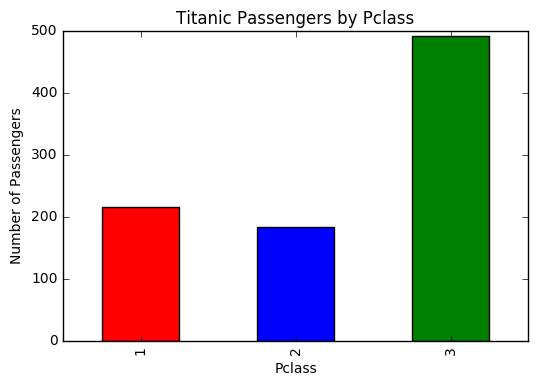

In [26]:
count_by_class.plot(kind='bar', title='Titanic Passengers by Pclass', color=['r','b','g'])
plt.ylabel('Number of Passengers')
plt.show()

In [27]:
group_by_class_survived = titanic_df.groupby(['Pclass','Survived'])
survivors_by_class = group_by_class_survived['Survived'].count()
survivors_by_class

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

This table breaks Pclass data down by survivors. As expected, we can see a higher survival rate for those of a higher class. Among first class passengers, 80 died and 136 survived (63%). Among second class passengers, 97 died and 87 lived (47%). Among third class passengers, only 119 out of 491 survived (24%). This difference is quite clear in the graph below.

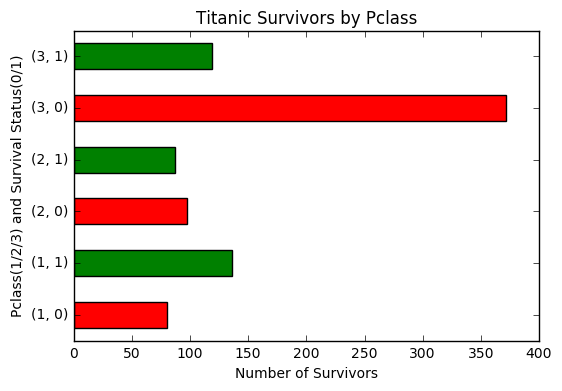

In [28]:
survivors_by_class.plot(kind='barh', title='Titanic Survivors by Pclass', color=['r','g','r','g','r','g'])
plt.xlabel('Number of Survivors')
plt.ylabel('Pclass(1/2/3) and Survival Status(0/1)')
plt.show()

#### Chi-squared Test for Independence
We can perform a chi squared test to determine if the data is statistically significant. We have two nominal variables so we can perform the test for independence. The chi squared test requires us to avoid dependent samples and small expected frequencies, but neither is a problem in this case.

##### Null Hypothesis:
- Survival rate will not differ according to Pclass (socioeconomic status). Survival and Pclass are independent variables.

##### Alternate Hypothesis:
- Survival and Pclass are not independent variables. Pclass influences survival.

In [29]:
chisquare([136, 80, 87, 97, 119, 372], f_exp=[82.90909091, 133.0909091, 70.62626263, 113.3737374, 188.4646465, 302.5353535])

Power_divergenceResult(statistic=102.88898880569124, pvalue=1.2999075171692763e-20)

In [128]:
# find critical value
from scipy.stats import chi2
# from : https://bytes.com/topic/python/answers/962734-how-calculate-critical-value-chi-square-distribution-python
chi2.isf(q=0.05, df=2)

5.9914645471079817

With this result, we can reject the null hypothesis because the chi square statistic of 102.89 far exceeds our critical value at alpha = 0.05 (5.991). We can conclude the two variables are not independent of each other.

In [129]:
# cramer's v

# Age

In [30]:
# summary stats for age
titanic_df['Age'].describe()

/Users/seanangiolillo/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [31]:
titanic_df['Age'].median()

28.0

The describe method gives us some basic info, like the mean age of 29.70, min age of 0.42, and max age of 80. Median is shown to be 28. All of these values seem reasonable and so there appear to be no outliers to consider.

The count of 714 suggest that Age data is missing for 177 entries. Rather than fill these entries with some value, I have chosen to ignore them. Below I plot Age data with histograms as I am most interested in seeing the respective distributions among all passengers vs. survivors. By default Pandas, drops NaNs when plotting a histogram. 

I don't believe filling the missing values with a particular value makes much sense. First, the given dataset, as explained below in the conclusions, is already only a subset of the actual event. And so, from a ship of 1317 passengers, looking at the age distribution trends of 714 passengers vs. 891 passengers will likely not be too worrisome. 

Filling NaNs with random values within the min and max range does not seem like it would lend any better insights. Filling NaNs with the median or mean values would centralize the data more so than it should be. And so with no better alternatives, leaving out missing age data seems to be the wisest option.

In [32]:
# 5 youngest passengers
youngest = titanic_df.sort_values(['Age'], ascending=True)
youngest.head()

VARIABLES,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42
756,1,2,"Hamalainen, Master. Viljo",male,0.67
645,1,3,"Baclini, Miss. Eugenie",female,0.75
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75
79,1,2,"Caldwell, Master. Alden Gates",male,0.83


In [33]:
# 5 oldest passengers
oldest = titanic_df.sort_values(['Age'], ascending=False)
oldest.head()

VARIABLES,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0
852,0,3,"Svensson, Mr. Johan",male,74.0
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0
97,0,1,"Goldschmidt, Mr. George B",male,71.0
117,0,3,"Connors, Mr. Patrick",male,70.5


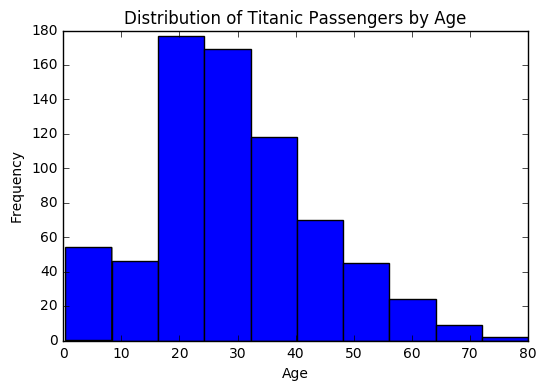

In [34]:
# plot passenger age
titanic_df['Age'].plot(kind='hist', title='Distribution of Titanic Passengers by Age')
plt.xlabel('Age')
plt.show()

The histogram shows a very reasonable distribution of ages given what we know about the event.

In [35]:
# boolean array of survivors
survivors = titanic_df.Survived == 1
# df of survivors
survivors_df = titanic_df[survivors]

In [36]:
oldest_survivors = survivors_df.sort_values(['Age'], ascending=False)
# 5 oldest survivors
oldest_survivors.head()

VARIABLES,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0
484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0
571,1,2,"Harris, Mr. George",male,62.0


In [37]:
youngest_survivors = survivors_df.sort_values(['Age'], ascending=True)
# 5 youngest survivors
youngest_survivors.head()

VARIABLES,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42
756,1,2,"Hamalainen, Master. Viljo",male,0.67
645,1,3,"Baclini, Miss. Eugenie",female,0.75
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75
832,1,2,"Richards, Master. George Sibley",male,0.83


In [38]:
survivors_df['Age'].describe()

/Users/seanangiolillo/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [39]:
survivors_df['Age'].median()

28.0

Our summary statistics for survivors' ages are not entirely differed from the overall passenger age set. The median is still 28. The survivor mean of 28.34 is only slightly lower than the passenger mean of 29.70. The standard deviations of both sets is nearly identical.

Our expectation is that survivors will skew younger than the overall passenger age data because 'women and children first' into the lifeboats is common to hear. The plot below shows this better. The frequency of survivors under 10 is higher than their representation in the overall dataset.

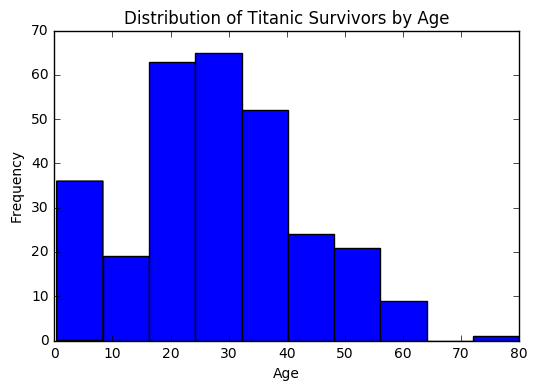

In [40]:
# plot survivor age
survivors_df['Age'].plot(kind='hist', title='Distribution of Titanic Survivors by Age')
plt.xlabel('Age')
plt.show()

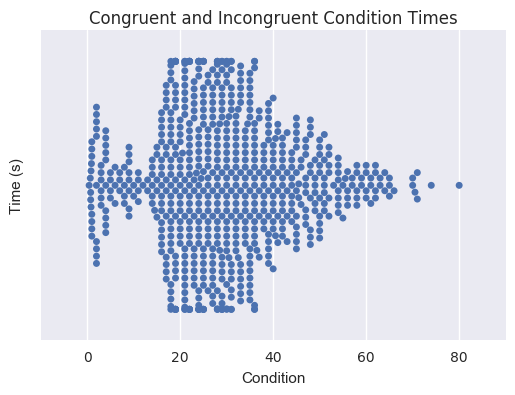

In [133]:
# a bee swarm plot is better but still hides the paired effect
_ = sns.swarmplot(titanic_df['Age'])

# Label the axes
_ = plt.xlabel('Condition')
_ = plt.ylabel('Time (s)')
_ = plt.title('Congruent and Incongruent Condition Times')
# Show the plot
plt.show()

In [ ]:
# test...independent samples t-test...

# Conclusions

I set out to manipulate the given dataset in order to answer these three questions:
- What impact did gender have on the likelihood of survival?
- What impact did socioeconomic status (as proxied by Pclass) have on the likelihood of surival?
- What impact did age have on the likelihood of survival?

After this anaylsis, it looks like gender, socioeconomic status, and age are all important variables in predicting who survived the Titanic.
- Females were much more likely than males to survive.
- First class passengers were much more likely to survive than third class passengers.
- Younger ages (children for instance) were more likely to survive than older passengers. However this seems to have been less influential than I initially expected.

## Tempering Conclusions

It is important to understand the limitations of this brief analysis. 

The strength of the given dataset is a good place to start. According to Wikipedia, approximately 2,344 people were aboard (https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic), 1317 of them passengers. Approximately 815 passengers died.

The investigated dataset included only 891 passengers. It is unclear how the dataset was assembled. Where are the missing passengers? Perhaps passengers with third class tickets might be less likely to have been properly recorded into the dataset but we do not know.

In future we could try to improve the dataset to ensure it is a more accurate representation. We could also conduct more stringent statistical tests but for now we have confirmed most of our expectations regarding the data.